### CASE 1 Visualize the Experiment Result

In [2]:
from cornac.experiment.experiment_explainers import Experiment_Explainers
from cornac.datasets.goodreads import prepare_data
from cornac.datasets import goodreads
from cornac.metrics_explainer import Metric_Exp_DIV as DIV, Metric_Exp_FPR as FPR, Metric_Exp_FA as FA, Metric_Exp_RA as RA
from cornac.models import EFM, MTER
from cornac.models import ALS, MF, EMF, NEMF

from cornac.explainer import Exp_EFM, Exp_MTER
from cornac.explainer import Exp_ALS as ALSExplainer, Exp_PHI4MF as PHI4MFExplainer, Exp_SU4EMF as EMFExplainer

from cornac.experiment import Visualization
from cornac.utils import cache
import warnings
warnings.filterwarnings('ignore')

/Users/yyz/miniconda3/envs/rose_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
rs_sent_dense = prepare_data(data_name="goodreads", test_size=0, dense=True, item=True, user=True, sample_size=1, seed=21)
fdiv = DIV()
fpr = FPR()
ground_truth_good_reads = goodreads.load_sentiment()
fpr_with_input_as_groundtruth = FPR(ground_truth=ground_truth_good_reads)
efm = EFM(max_iter=20, num_explicit_factors=50, num_latent_factors=50, num_most_cared_aspects=50, alpha=0.85,lambda_h=0.1, lambda_u=0.001, lambda_v=0.01, lambda_x=1.0, lambda_y= 0.1)
efm_exp = Exp_EFM(rec_model=efm, dataset=rs_sent_dense.train_set)
mter = MTER(max_iter=20, n_aspect_factors=8, n_item_factors=5, n_opinion_factors= 5, n_user_factors= 10, lambda_bpr=10, lambda_reg= 10, n_bpr_samples=1000, n_element_samples=50)
mter_exp = Exp_MTER(rec_model=mter, dataset=rs_sent_dense.train_set)

rs_dense = prepare_data(data_name="goodreads_uir_1000", test_size=0, dense=True, item=True, user=True, sample_size=1, seed=21)
emf = EMF(k=10, max_iter=500, learning_rate=0.001, lambda_reg=0.1, explain_reg=0.01, verbose=True, seed=6, num_threads=6, early_stop=True)
nemf = NEMF(k=10, max_iter=500, learning_rate=0.001, lambda_reg=0.1, explain_reg=0.01, novel_reg=1, verbose=True, seed=6, num_threads=6, early_stop=True)
als = ALS(k=10, max_iter=500, lambda_reg=0.001, alpha=1, verbose=True, seed=6)
als_exp = ALSExplainer(rec_model=als, dataset=rs_dense.train_set)
emf_exp = EMFExplainer(rec_model=emf, dataset=rs_dense.train_set)
nemf_exp = EMFExplainer(rec_model=nemf, dataset=rs_dense.train_set)

# models = [(als, als_exp), (emf, emf_exp), (nemf, nemf_exp)]
models = [(als, als_exp)]
metrics = [fdiv]
experiment = Experiment_Explainers(eval_method=rs_dense, models=models, metrics=metrics,rec_k=10, feature_k=10, eval_train=True)
experiment.run()

models = [(efm, efm_exp), (mter, mter_exp)]
metrics = [fdiv, fpr_with_input_as_groundtruth]
experiment_sent = Experiment_Explainers(eval_method=rs_sent_dense, models=models, metrics=metrics,rec_k=10, feature_k=10, eval_train=True)
experiment_sent.run()

INFO:cornac.experiment.experiment_explainers:Start training Recommender ALS...
100%|██████████| 500/500 [00:01<00:00, 417.70it/s, loss=0.0285]
INFO:implicit:Final training loss 0.0285
INFO:cornac.experiment.experiment_explainers:*****Start evaluating model-explainer: 'ALS:Exp_ALS'...
INFO:cornac.experiment.experiment_explainers:Step 1/3: Recommender ALS creates recommendations
INFO:cornac.experiment.experiment_explainers:Step 2/3: Explainer Exp_ALS create explanation for all recommendations
Computing explanations: 100%|██████████| 1000/1000 [00:02<00:00, 335.76it/s]
INFO:cornac.experiment.experiment_explainers:Step 3/3: Metric Metric_Exp_DIV starts evaluation...
INFO:cornac.experiment.experiment_explainers:Result: Feature diversity: 0.15033573573555856
INFO:cornac.experiment.experiment_explainers:experiment data: [[0.15033573573555856, 1.234774112701416, 3.8778128623962402]]
INFO:cornac.experiment.experiment_explainers:Experiment result: 
 recommender:explainer |      Metric_Exp_DIV | 

Plot the bar chart for the metrics:


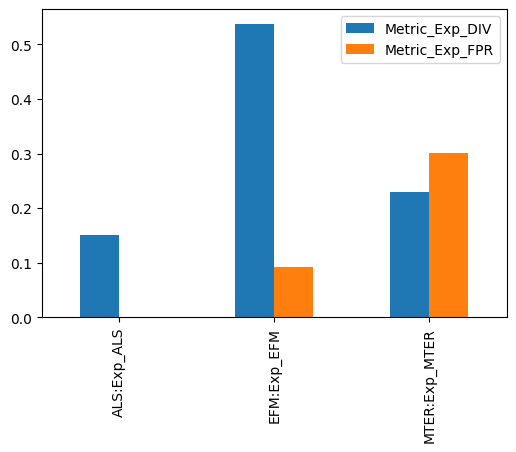

               Metric_Exp_DIV  Metric_Exp_FPR
ALS:Exp_ALS          0.150336        0.000000
EFM:Exp_EFM          0.537337        0.092513
MTER:Exp_MTER        0.229126        0.301079
Plot the bar chart for the cost:


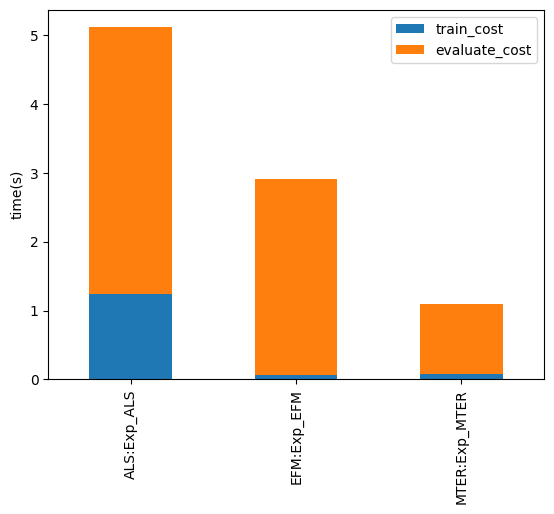

In [4]:
vis = Visualization()
vis.visualize_experiemnt_result([experiment, experiment_sent], kind="bar")

### CASE 2 Visualize the Effect of Parameters' Change (rec_k, feature_k)
Problem:
    - Explainaer_Experiment(models = [model_1, model_2], rec_k=10, feature_k = 10) fixed parameter for all models/explainers 
Solution:
    - Pass a list of Explainer_Experiment Object to func Visualization_Parameter_Change([EE_1, EE_2, EE_3], param_name = 'rec_k/feature_k')

##### 2.1 Metrics FDIV&FPR on the sentiment-related model & explainers vs feature_k

In [5]:
from cornac.experiment.experiment_explainers import Experiment_Explainers
from cornac.datasets.goodreads import prepare_data
from cornac.metrics_explainer import Metric_Exp_DIV as DIV, Metric_Exp_FPR as FPR, Metric_Exp_FA as FA, Metric_Exp_RA as RA
from cornac.models import EFM, MTER
from cornac.models import ALS, MF, EMF, NEMF

from cornac.explainer import Exp_EFM, Exp_MTER
from cornac.explainer import Exp_ALS, Exp_PHI4MF, Exp_SU4EMF

from cornac.experiment import Visualization
from cornac.utils import cache
import warnings
warnings.filterwarnings('ignore')

In [6]:
feature_k_list = [i for i in range(5, 11)]
rs_sent_dense = prepare_data(data_name="goodreads", test_size=0, dense=True, item=True, user=True, sample_size=1, seed=21)
fdiv = DIV()
fpr = FPR()
ground_truth_good_reads = goodreads.load_sentiment()
fpr_with_input_as_groundtruth = FPR(ground_truth=ground_truth_good_reads)
efm = EFM(max_iter=20, num_explicit_factors=50, num_latent_factors=50, num_most_cared_aspects=50, alpha=0.85,lambda_h=0.1, lambda_u=0.001, lambda_v=0.01, lambda_x=1.0, lambda_y= 0.1)
efm_exp = Exp_EFM(rec_model=efm, dataset=rs_sent_dense.train_set)

mter = MTER(max_iter=20, n_aspect_factors=8, n_item_factors=5, n_opinion_factors= 5, n_user_factors= 10, lambda_bpr=10, lambda_reg= 10, n_bpr_samples=1000, n_element_samples=50)
mter_exp = Exp_MTER(rec_model=mter, dataset=rs_sent_dense.train_set)

models = [(efm, efm_exp), (mter, mter_exp)]
metrics = [fdiv, fpr_with_input_as_groundtruth]

### To visualize the effect of increasing the number of features, we can run the experiment for different values of feature_k
EE_list = []
for feature_k in feature_k_list:
    experiment_sent = Experiment_Explainers(eval_method=rs_sent_dense, models=models, metrics=metrics,rec_k=10, feature_k=feature_k, eval_train=True)
    experiment_sent.run()
    EE_list.append(experiment_sent)


INFO:cornac.experiment.experiment_explainers:Start training Recommender EFM...
INFO:cornac.experiment.experiment_explainers:*****Start evaluating model-explainer: 'EFM:Exp_EFM'...
INFO:cornac.experiment.experiment_explainers:Step 1/3: Recommender EFM creates recommendations
INFO:cornac.experiment.experiment_explainers:Step 2/3: Explainer Exp_EFM create explanation for all recommendations
Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 8347.94it/s]
INFO:cornac.experiment.experiment_explainers:Step 3/3: Metric Metric_Exp_DIV starts evaluation...
INFO:cornac.experiment.experiment_explainers:Result: Feature diversity: 0.5531531531529946
INFO:cornac.experiment.experiment_explainers:Step 3/3: Metric Metric_Exp_FPR starts evaluation...
Start evaluation... :   0%|          | 0/9000 [00:00<?, ?it/s]
INFO:cornac.experiment.experiment_explainers:Result: Feature Precision: 0.3889541715628672; Feature Recall: 0.058709994930925845; Harmonic Mean: 0.09340723655307186
INFO:cornac.expe

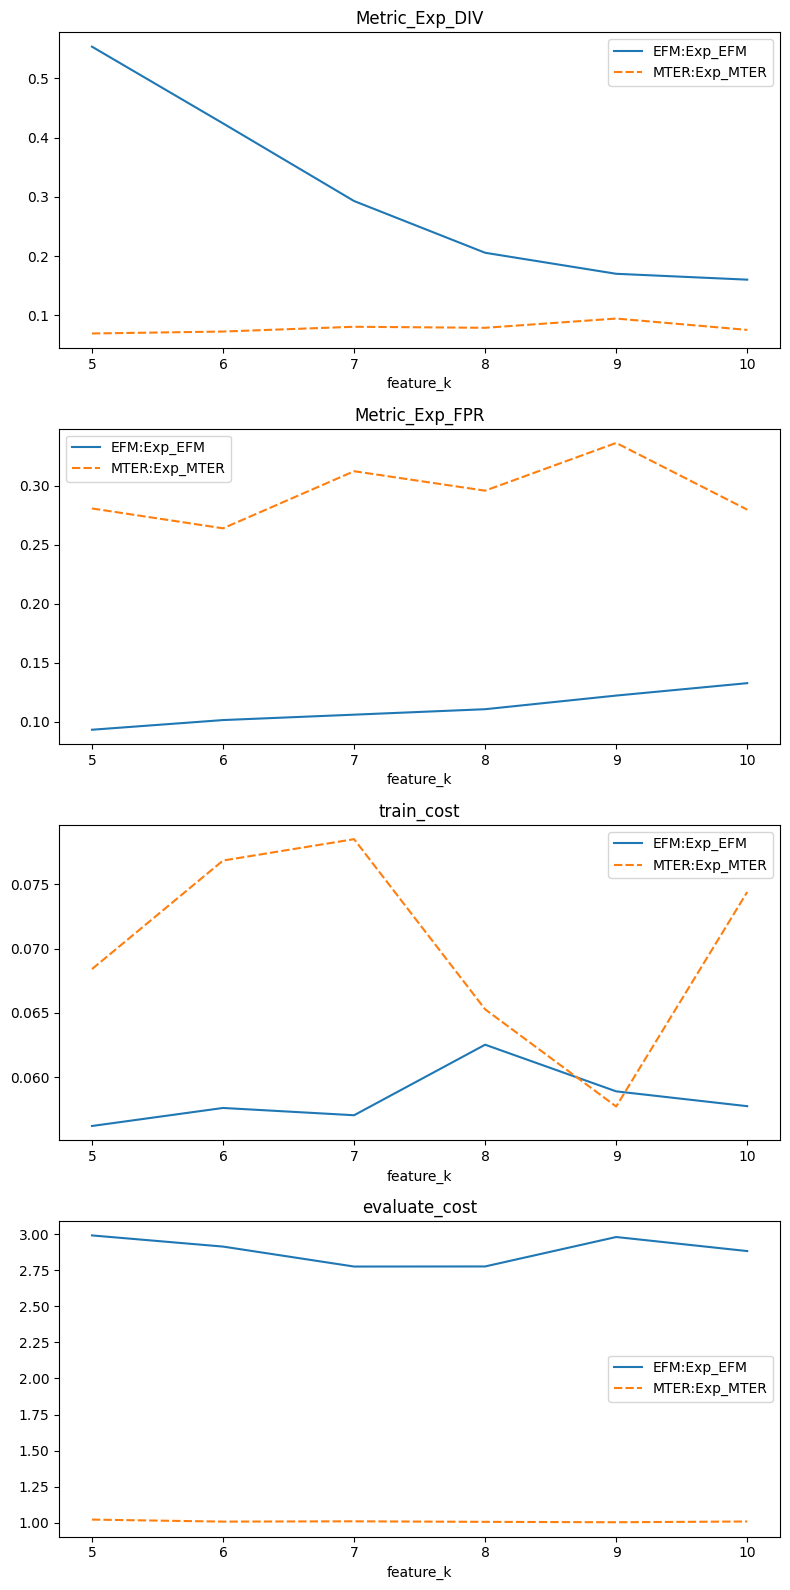

In [7]:
vis = Visualization()
vis.visualize_target_k(EE_list, target_k_name="feature_k", kind="line")

##### 2.1 Metrics FDIV on the MF models & explainers vs feature_k

In [9]:
rs_dense = prepare_data(data_name="goodreads_uir_1000", test_size=0, dense=True, item=True, user=True, sample_size=1, seed=21)
emf = EMF(k=10, max_iter=500, learning_rate=0.001, lambda_reg=0.1, explain_reg=0.01, verbose=True, seed=6, num_threads=6, early_stop=True)
nemf = NEMF(k=10, max_iter=500, learning_rate=0.001, lambda_reg=0.1, explain_reg=0.01, novel_reg=1, verbose=True, seed=6, num_threads=6, early_stop=True)
als = ALS(k=10, max_iter=500, lambda_reg=0.001, alpha=1, verbose=True, seed=6)
als_exp = Exp_ALS(rec_model=als, dataset=rs_dense.train_set)
emf_exp = Exp_PHI4MF(rec_model=emf, dataset=rs_dense.train_set)
nemf_exp = Exp_SU4EMF(rec_model=nemf, dataset=rs_dense.train_set)
fdiv = DIV()
models = [(als, als_exp), (emf, emf_exp), (nemf, nemf_exp)]
metrics = [fdiv]
experiment = Experiment_Explainers(eval_method=rs_dense, models=models, metrics=metrics,rec_k=10, feature_k=10, eval_train=True)

# feature_k_list = [i for i in range(5, 11)]
rec_k_list = [i for i in range(5, 11)]
EE_list = []
for rec_k in rec_k_list:
    print(f"\nCurrent loop: Processing rec_k = {rec_k}")
    experiment = Experiment_Explainers(eval_method=rs_dense, models=models, metrics=metrics,rec_k=rec_k, feature_k=10, eval_train=True)
    experiment.run()
    EE_list.append(experiment)


INFO:cornac.experiment.experiment_explainers:Start training Recommender ALS...



 loop: Processing rec_k = 5


100%|██████████| 500/500 [00:01<00:00, 499.52it/s, loss=0.0284]
INFO:implicit:Final training loss 0.0284
INFO:cornac.experiment.experiment_explainers:*****Start evaluating model-explainer: 'ALS:Exp_ALS'...
INFO:cornac.experiment.experiment_explainers:Step 1/3: Recommender ALS creates recommendations
INFO:cornac.experiment.experiment_explainers:Step 2/3: Explainer Exp_ALS create explanation for all recommendations
Computing explanations: 100%|██████████| 500/500 [00:01<00:00, 408.57it/s]
INFO:cornac.experiment.experiment_explainers:Step 3/3: Metric Metric_Exp_DIV starts evaluation...
INFO:cornac.experiment.experiment_explainers:Result: Feature diversity: 0.15814749498999808
INFO:cornac.experiment.experiment_explainers:Start training Recommender EMF...
100%|██████████| 500/500 [00:00<00:00, 2730.71it/s, loss=5978.18]
INFO:cornac.experiment.experiment_explainers:*****Start evaluating model-explainer: 'EMF:Exp_PHI4MF'...
INFO:cornac.experiment.experiment_explainers:Step 1/3: Recommender EM

Optimization finished!


Computing explanations:   3%|▎         | 15/500 [01:15<28:56,  3.58s/it]  

Association rules generated


Computing explanations: 100%|██████████| 500/500 [01:17<00:00,  6.43it/s] 
INFO:cornac.experiment.experiment_explainers:Step 3/3: Metric Metric_Exp_DIV starts evaluation...
INFO:cornac.experiment.experiment_explainers:Result: Feature diversity: 0.0005138276553106232
INFO:cornac.experiment.experiment_explainers:Start training Recommender NEMF...


Start compute edge weight matrix...
Start compute novel matrix...
Matrix computation finished!


100%|██████████| 500/500 [00:00<00:00, 2549.04it/s, loss=6160.56]
INFO:cornac.experiment.experiment_explainers:*****Start evaluating model-explainer: 'NEMF:Exp_SU4EMF'...
INFO:cornac.experiment.experiment_explainers:Step 1/3: Recommender NEMF creates recommendations
INFO:cornac.experiment.experiment_explainers:Step 2/3: Explainer Exp_SU4EMF create explanation for all recommendations


Optimization finished!


Computing explanations: 100%|██████████| 500/500 [00:00<00:00, 1423.33it/s]
INFO:cornac.experiment.experiment_explainers:Step 3/3: Metric Metric_Exp_DIV starts evaluation...
INFO:cornac.experiment.experiment_explainers:Result: Feature diversity: 0.3935931831918986
INFO:cornac.experiment.experiment_explainers:experiment data: [[0.15814749498999808, 1.003896951675415, 1.5550620555877686], [0.0005138276553106232, 0.22200322151184082, 78.00629377365112], [0.3935931831918986, 0.24901390075683594, 0.571674108505249]]
INFO:cornac.experiment.experiment_explainers:Experiment result: 
 recommender:explainer |        Metric_Exp_DIV |            Train(s) |        Evaluate(s)
ALS:Exp_ALS           |   0.15814749498999808 |   1.003896951675415 | 1.5550620555877686
EMF:Exp_PHI4MF        | 0.0005138276553106232 | 0.22200322151184082 |  78.00629377365112
NEMF:Exp_SU4EMF       |    0.3935931831918986 | 0.24901390075683594 |  0.571674108505249

INFO:cornac.experiment.experiment_explainers:Start training 


 loop: Processing rec_k = 6


100%|██████████| 500/500 [00:01<00:00, 490.52it/s, loss=0.0284]
INFO:implicit:Final training loss 0.0284
INFO:cornac.experiment.experiment_explainers:*****Start evaluating model-explainer: 'ALS:Exp_ALS'...
INFO:cornac.experiment.experiment_explainers:Step 1/3: Recommender ALS creates recommendations
INFO:cornac.experiment.experiment_explainers:Step 2/3: Explainer Exp_ALS create explanation for all recommendations
Computing explanations: 100%|██████████| 600/600 [00:01<00:00, 404.26it/s]
INFO:cornac.experiment.experiment_explainers:Step 3/3: Metric Metric_Exp_DIV starts evaluation...
INFO:cornac.experiment.experiment_explainers:Result: Feature diversity: 0.15451419031711555
INFO:cornac.experiment.experiment_explainers:Start training Recommender EMF...
100%|██████████| 500/500 [00:00<00:00, 2476.39it/s, loss=5971.86]
INFO:cornac.experiment.experiment_explainers:*****Start evaluating model-explainer: 'EMF:Exp_PHI4MF'...
INFO:cornac.experiment.experiment_explainers:Step 1/3: Recommender EM

Optimization finished!


Computing explanations: 100%|██████████| 600/600 [00:02<00:00, 205.25it/s]


AttributeError: 'list' object has no attribute 'keys'

In [ ]:
vis = Visualization()
vis.visualize_target_k(EE_list, target_k_name="rec_k", kind="bar")

IndexError: index 0 is out of bounds for axis 0 with size 0

### CASE 3 Visualize feature importance



In [ ]:
import numpy as np
from cornac.models.fm_py import FMRec
from cornac.explainer.exp_limers import Exp_LIMERS
from cornac.datasets.goodreads import prepare_data
import warnings
warnings.filterwarnings('ignore')

rs = prepare_data(data_name="goodreads_limers", test_size=0.2, dense=True, item=True, user=False, sample_size=0.5, seed=21)
fm = FMRec()
fm.fit(train_set=rs.train_set)
explainer = Exp_LIMERS(fm, fm.train_set)
users = np.array(list(rs.train_set.uid_map.keys()))
items = np.array(list(rs.train_set.iid_map.keys()))
recommendations = fm.recommend_to_multiple_users(users)
explanations = explainer.explain_recommendations(recommendations)

/Users/yyz/miniconda3/envs/rose_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Creating validation dataset of 0.01 of training for adaptive regularization
-- Epoch 1
Training MSE: 0.89424
-- Epoch 2
Training MSE: 0.74081
-- Epoch 3
Training MSE: 0.72055
-- Epoch 4
Training MSE: 0.70196
-- Epoch 5
Training MSE: 0.69348
-- Epoch 6
Training MSE: 0.68345
-- Epoch 7
Training MSE: 0.67570
-- Epoch 8
Training MSE: 0.66859
-- Epoch 9
Training MSE: 0.66165
-- Epoch 10
Training MSE: 0.65072


Computing explanations: 100%|██████████| 10000/10000 [01:59<00:00, 83.56it/s]


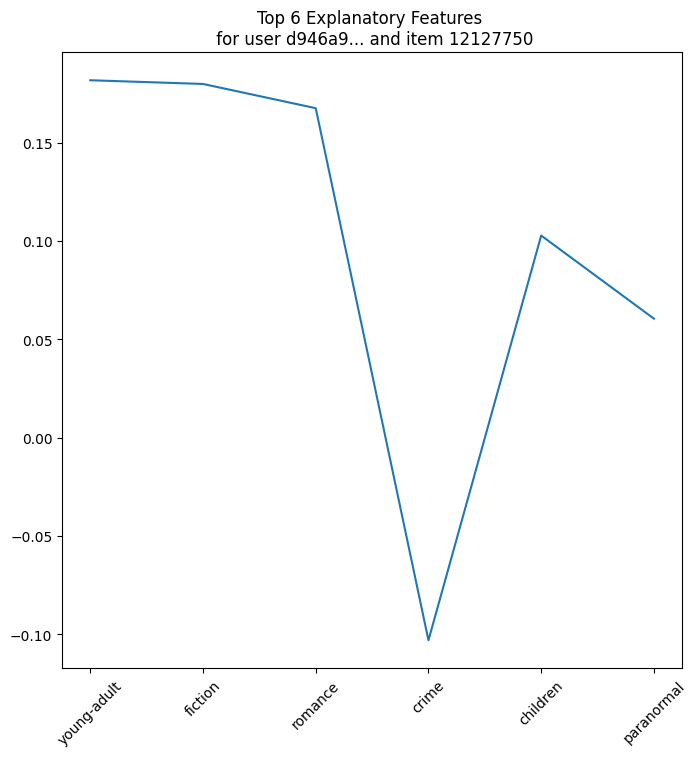

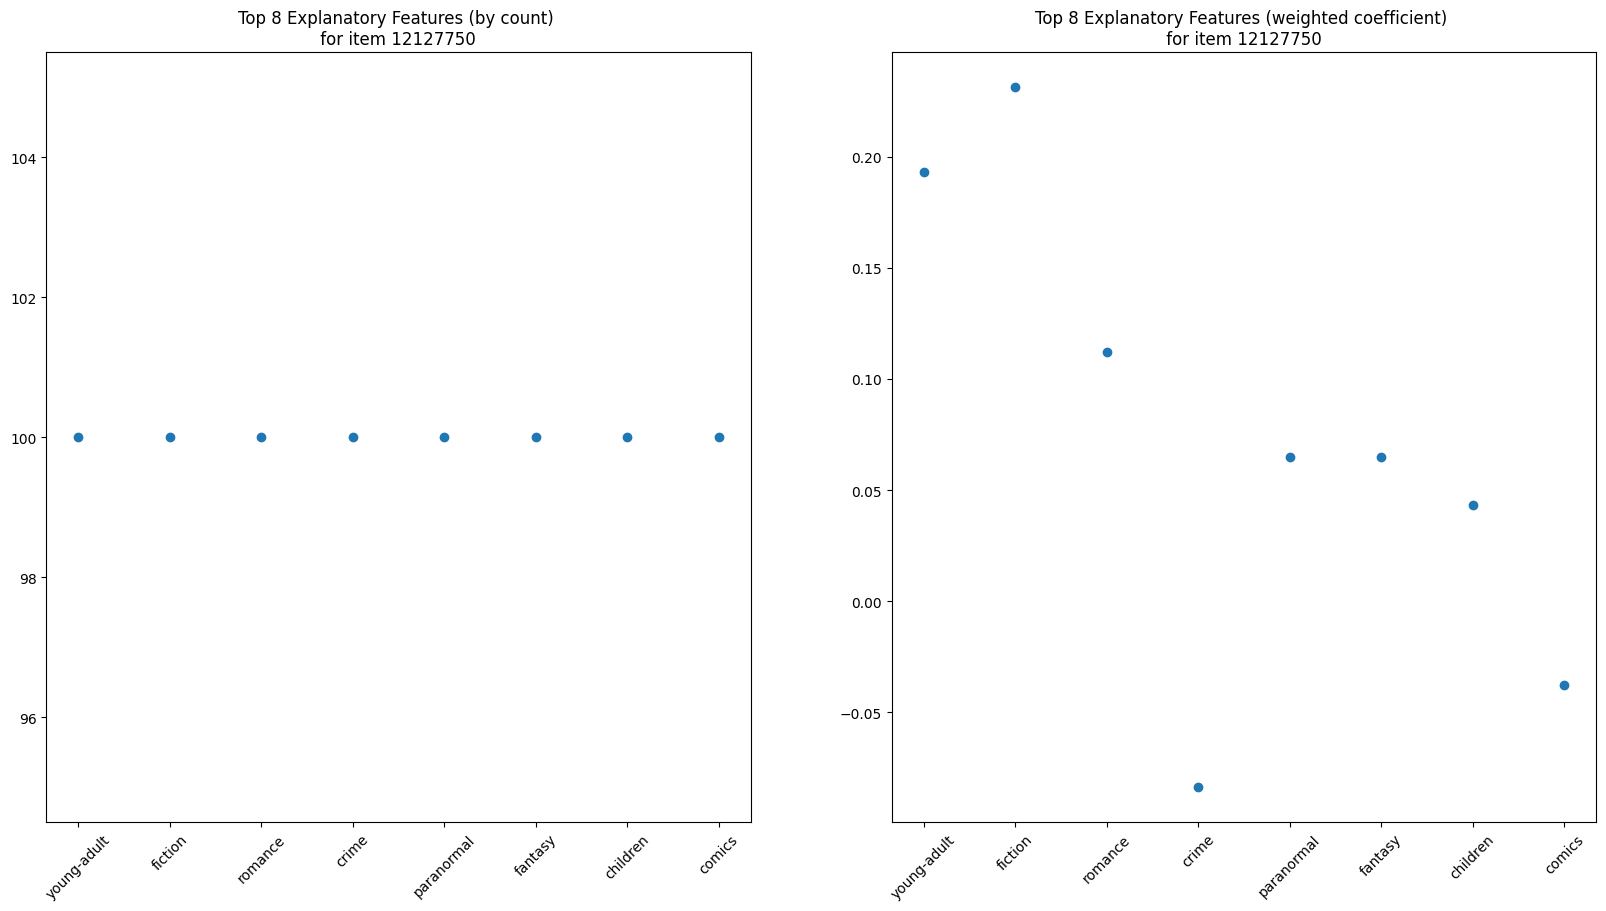

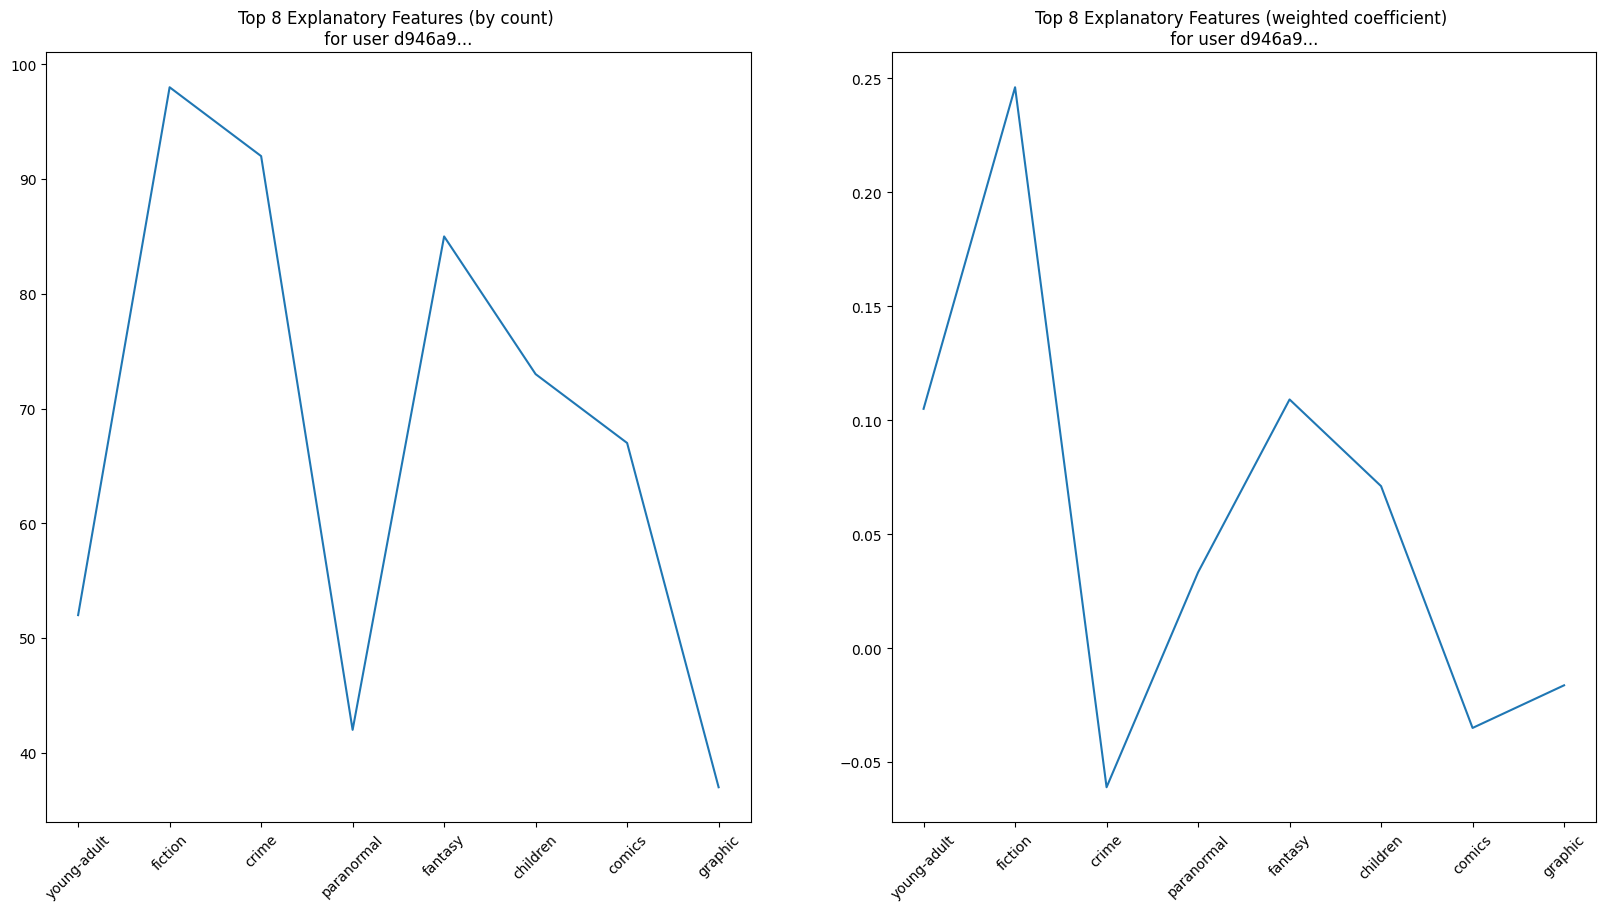

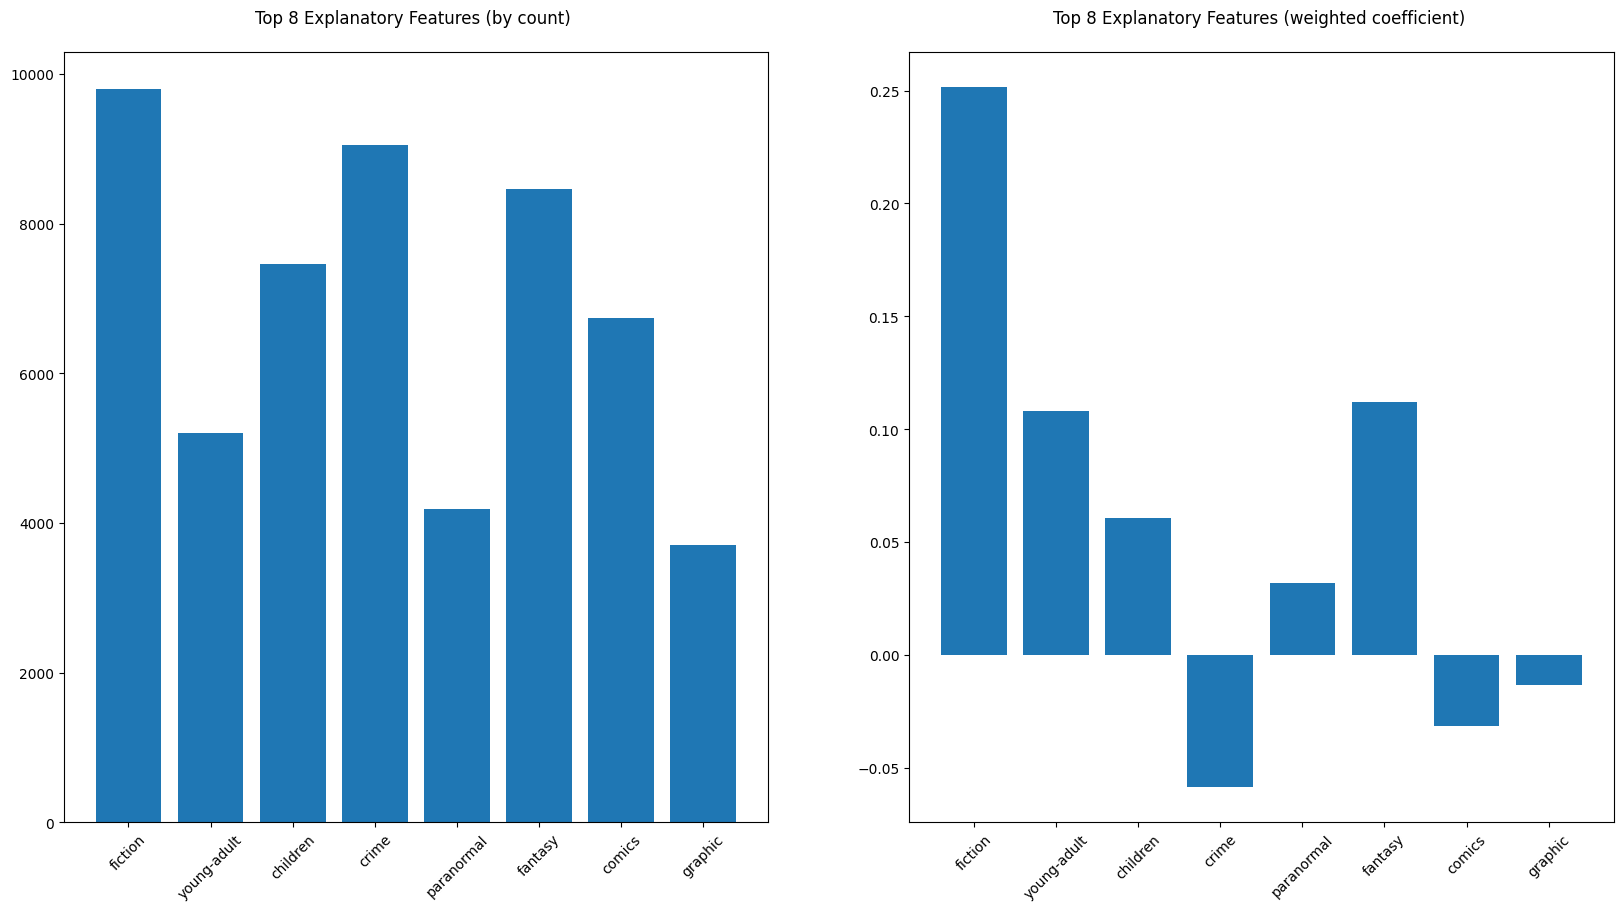

In [ ]:
from cornac.experiment.visualization import Visualization

explanations_df = explanations.copy()
my_plots = Visualization()
ind_df = my_plots.create_individual_feature_importance_plot(explanations, user_id='d946a9aaa488924227a587c91564a484', item_id=12127750, type="line", top_k=6, save_plot=False)

filtered_df1 = my_plots.create_aggregate_feature_importance_plot(explanations, item_id=12127750, type="scatter", top_k=8, save_plot=False)

filtered_df2 = my_plots.create_aggregate_feature_importance_plot(explanations, user_id='d946a9aaa488924227a587c91564a484', type="line", top_k=8, save_plot=False)

filtered_df3 = my_plots.create_aggregate_feature_importance_plot(explanations, type="bar", top_k=8, save_plot=False)